In [2]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'branchtaxi' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_6624f297_18464491a04') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results.head()

,trip_month,trip_year,avg_fare,avg_miles,avg_fare_per_mile
0,01,2013,12.088372,5.298489,16.241447
1,01,2014,11.530143,3.070749,15.888121
2,01,2015,11.951160,3.547492,11.271908
3,01,2016,13.109539,3.989147,9.684148
4,01,2017,13.230520,3.868283,8.105213


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

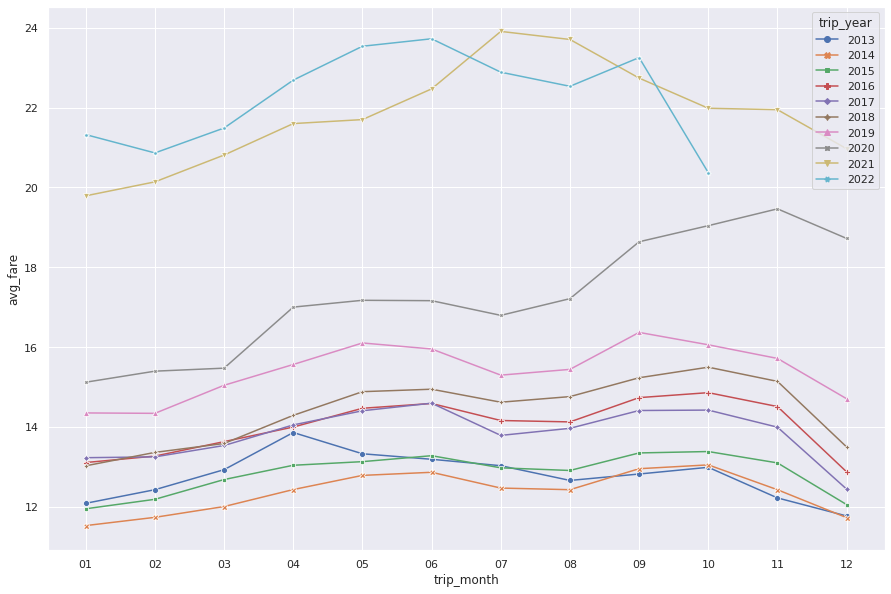

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=results, x='trip_month', y='avg_fare', hue='trip_year', style='trip_year', markers=True, dashes=False)

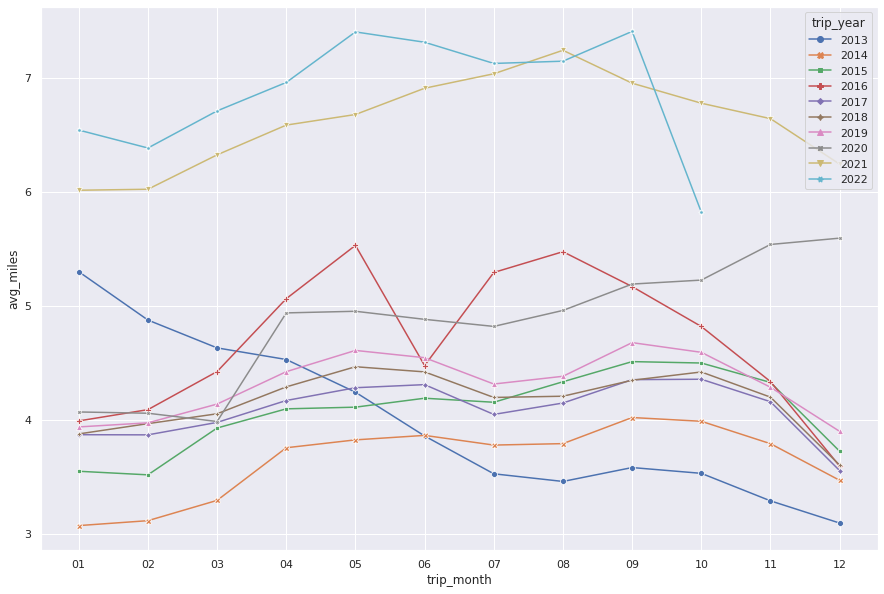

In [6]:
sns.lineplot(data=results, x='trip_month', y='avg_miles', hue='trip_year', style='trip_year', markers=True, dashes=False)

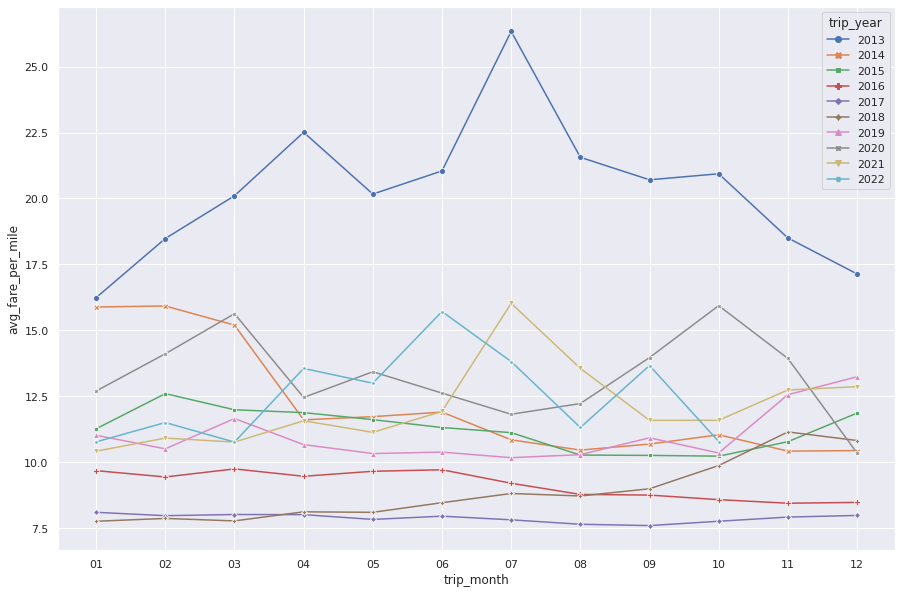

In [7]:
sns.lineplot(data=results, x='trip_month', y='avg_fare_per_mile', hue='trip_year', style='trip_year', markers=True, dashes=False)

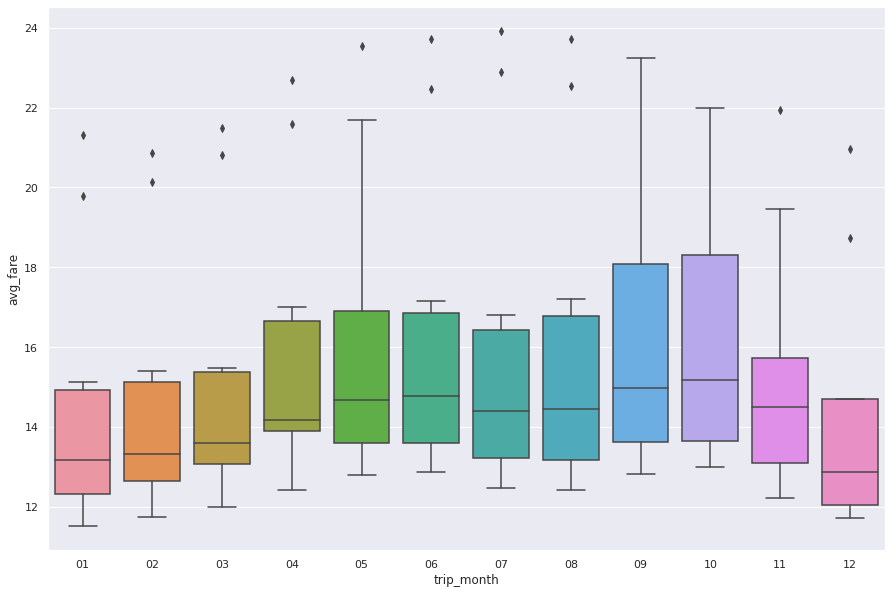

In [9]:
sns.boxplot(data=results, x='trip_month', y='avg_fare')